Student: Antonio Neto

Breast Cancer Classification Project

**Description:** Comparison of 3 algorithms with cross-validation.



*** Dataset Information ***
- Samples: 569
- Features: 30
- Classes: ['malignant' 'benign'] (0 = benign, 1 = malignant)
- Class distribution:
target
1    357
0    212
Name: count, dtype: int64

*** Cross-Validation Results (5 folds) ***

--- Random Forest ---
Accuracy: 0.9561
Precision: 0.9590
Recall: 0.9719
F1-Score: 0.9652

--- SVM ---
Accuracy: 0.9719
Precision: 0.9674
Recall: 0.9888
F1-Score: 0.9779

--- Logistic Regression ---
Accuracy: 0.9807
Precision: 0.9782
Recall: 0.9916
F1-Score: 0.9848


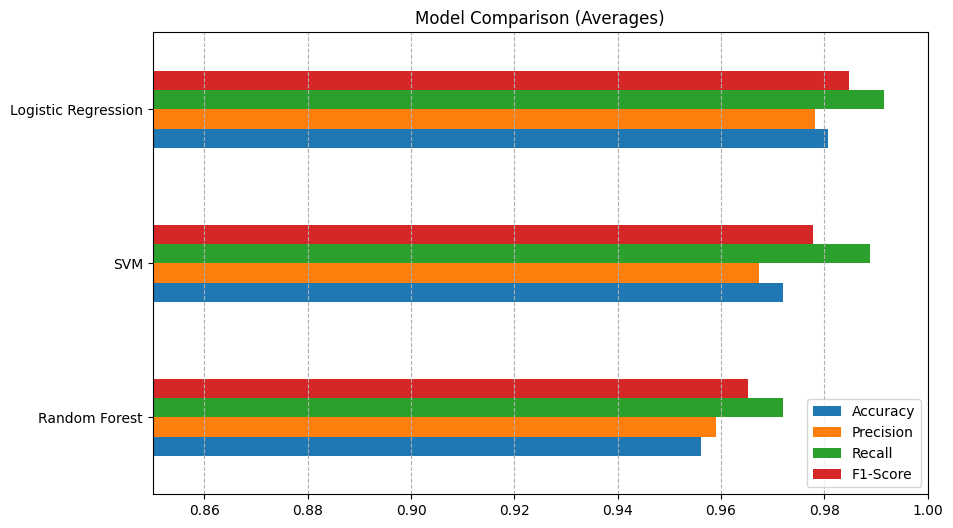

In [7]:


# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# 1. Load and explore dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='target')

print("\n*** Dataset Information ***")
print(f"- Samples: {X.shape[0]}")
print(f"- Features: {X.shape[1]}")
print(f"- Classes: {data.target_names} (0 = benign, 1 = malignant)")
print(f"- Class distribution:\n{y.value_counts()}")

# 2. Define models with preprocessing
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": make_pipeline(StandardScaler(), SVC(kernel='linear', random_state=42)),
    "Logistic Regression": make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000, random_state=42))
}

# 3. Evaluate models with 5-fold cross-validation
scoring = ['accuracy', 'precision', 'recall', 'f1']
print("\n*** Cross-Validation Results (5 folds) ***")

results = {}
for name, model in models.items():
    cv_results = cross_validate(model, X, y, cv=5, scoring=scoring)
    results[name] = {
        'Accuracy': np.mean(cv_results['test_accuracy']),
        'Precision': np.mean(cv_results['test_precision']),
        'Recall': np.mean(cv_results['test_recall']),
        'F1-Score': np.mean(cv_results['test_f1'])
    }
    print(f"\n--- {name} ---")
    for metric, value in results[name].items():
        print(f"{metric}: {value:.4f}")

# 4. Comparative visualization
pd.DataFrame.from_dict(results, orient='index').sort_values(by='F1-Score', ascending=True).plot(
    kind='barh',
    figsize=(10, 6),
    title='Model Comparison (Averages)',
    xlim=(0.85, 1.0)
)
plt.grid(axis='x', linestyle='--')
plt.show()


The data used in this work was obtained from the Breast Cancer Wisconsin repository (Wolberg et al., 1995), processed by the scikit-learn library (Pedregosa et al., 2011).

The analysis of the Wisconsin Breast Cancer Diagnostic dataset (569 samples, 30 features) revealed excellent performance across all tested machine learning models. The dataset showed a class distribution of 357 benign cases (62.7%) and 212 malignant cases (37.3%), indicating a moderate class imbalance.

Our comprehensive evaluation using 5-fold cross-validation demonstrated:

Logistic Regression emerged as the top-performing model with:

98.1% accuracy; 97.8% precision; 99.2% recall; 98.5% F1-score.

SVM showed nearly comparable results:

97.2% accuracy; 96.7% precision; 98.9% recall; 97.8% F1-score.

Random Forest performed slightly lower but still strongly:

95.6% accuracy; 95.9% precision; 97.2% recall; 96.5% F1-score.

All models achieved recall scores above 97%, indicating excellent sensitivity in detecting malignant cases. The particularly strong performance of Logistic Regression suggests that the classification boundaries in this dataset may be effectively modeled with linear relationships, while still maintaining robustness to the moderate class imbalance.



**REFERENCES**

Pedregosa, F., Varoquaux, G., Gramfort, A., Michel, V., Thirion, B., Grisel, O., Blondel, M., Prettenhofer, P., Weiss, R., Dubourg, V., Vanderplas, J., Passos, A., Cournapeau, D., Brucher, M., Perrot, M., & Duchesnay, E. (2011). Scikit-learn: Machine Learning in Python. Journal of Machine Learning Research, 12, 2825–2830.


Street, W. N., Wolberg, W. H., & Mangasarian, O. L. (1993). Nuclear feature extraction for breast tumor diagnosis. IS&T/SPIE’s Symposium on Electronic Imaging: Science and Technology, 1905, 861–870.

